# Model Interpretation

### I have identified a subset of features to focus on in the previous tasks. Now I am going to see how the features relate to the target variable and how these features relate to each other.

In [1]:
import plotnine
import scipy

In [2]:
scipy.__version__

'1.2.0'

### Loading the data

In [3]:
import pandas as pd
#Loading the selected dataset with 10 features in the previous task.

X_train = pd.read_feather('./X_train') 
y_train = pd.read_feather('./y_train')

X_val = pd.read_feather('./X_val')
y_val = pd.read_feather('./y_val')

X_test = pd.read_feather('./X_test')
y_test = pd.read_feather('./y_test')

In [4]:
X_train.shape

(131, 10)

In [5]:
y_train.drop(columns='index', inplace=True)

In [6]:
y_train.head(2)

,normalized_losses
0,110.0
1,77.0


In [7]:
y_train = y_train['normalized_losses']

In [8]:
X_val.shape

(33, 10)

In [9]:
y_val.drop(columns='index', inplace=True)

In [10]:
y_val.head(2)

,normalized_losses
0,137.0
1,128.0


In [11]:
y_val = y_val['normalized_losses']

In [12]:
X_test.drop(columns='index', inplace=True)

In [13]:
X_test = X_test[X_train.columns]

In [14]:
X_test.shape

(41, 10)

In [15]:
y_test.drop(columns='index', inplace=True)

In [16]:
y_test.head(2)

,normalized_losses
0,122.0
1,122.0


In [17]:
y_test = y_test['normalized_losses']

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr_tuned = RandomForestRegressor(min_samples_leaf = 4,
                                  n_estimators = 14,
                                  max_features = 0.5, random_state=1)

In [19]:
rfr_tuned.fit(X_train, y_train)
rfr_tuned.score(X_val, y_val)

0.5166901930384304

### Exploring the top features

In [20]:
import eli5
from eli5.sklearn import PermutationImportance
pmi = PermutationImportance(rfr_tuned).fit(X_val, y_val)

In [21]:
eli5.explain_weights_df(pmi, feature_names = X_val.columns.to_list())

,feature,weight,std
0,height,0.300063,0.142072
1,symboling,0.194584,0.052529
2,price,0.113118,0.074569
3,length,0.097388,0.022867
4,wheel-base,0.053344,0.023583
5,num_of_doors,0.042245,0.023196
6,peak_rpm,0.037073,0.017665
7,width,0.027651,0.035799
8,highway_mpg,0.002440,0.004557
9,make_other,0.000846,0.003579


In [22]:
eli5.show_weights(pmi, feature_names = X_val.columns.to_list())

Weight,Feature
0.3001 ± 0.2841,height
0.1946 ± 0.1051,symboling
0.1131 ± 0.1491,price
0.0974 ± 0.0457,length
0.0533 ± 0.0472,wheel-base
0.0422 ± 0.0464,num_of_doors
0.0371 ± 0.0353,peak_rpm
0.0277 ± 0.0716,width
0.0024 ± 0.0091,highway_mpg
0.0008 ± 0.0072,make_other


## Model Interpretation

#### Above 10 features are top features. I will determine how the target variable ("normalized_losses") changes as one of the features changes. I can visualize this by plotting the target variable against changes in feature.

#### I am not assuming the relationship to be linear, so I will use plotnine which allows me to plot non-linear relationships.

In [23]:
import plotnine
from plotnine import *

In [24]:
X_train.shape

(131, 10)

In [25]:
X_train.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other
0,-1.0,4.0,103.3,174.6,64.6,59.8,5000.0,30.0,8921.0,1.0
1,0.0,4.0,95.7,169.7,63.6,59.1,4800.0,37.0,6918.0,0.0


In [26]:
X_train1 = X_train.copy()

In [27]:
X_train1['normalized_losses'] = y_train

In [28]:
X_train1.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other,normalized_losses
0,-1.0,4.0,103.3,174.6,64.6,59.8,5000.0,30.0,8921.0,1.0,110.0
1,0.0,4.0,95.7,169.7,63.6,59.1,4800.0,37.0,6918.0,0.0,77.0


In [29]:
sampled_train = X_train1.sample(n=131, random_state=1)

In [30]:
sampled_train.head(3)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other,normalized_losses
42,1.0,2.0,96.5,169.1,66.0,51.0,5500.0,31.0,10345.0,0.0,107.0
80,0.0,4.0,96.9,173.6,65.4,54.9,4800.0,29.0,8013.0,0.0,85.0
128,2.0,2.0,99.8,177.3,66.3,53.1,5500.0,25.0,15250.0,1.0,122.0


### I will plot the top three features among the ten selected features, based on the permutation importance weights. Hence, I am drawing 'height', 'symboling', 'price', vs. 'normalized_losses', respectiely. 

### 'height' vs. 'normalized_losses'

In [31]:
sampled_train['height'].describe()

count    131.000000
mean      53.700000
std        2.572637
min       47.800000
25%       51.600000
50%       54.100000
75%       55.550000
max       59.800000
Name: height, dtype: float64

In [32]:
sampled_train['normalized_losses'].describe()

count    131.000000
mean     124.564885
std       32.589781
min       65.000000
25%      103.000000
50%      122.000000
75%      148.000000
max      231.000000
Name: normalized_losses, dtype: float64

C:\Users\Minyeong\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\smoothers.py:261: PlotnineWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "for parameters to pass in as 'method_args'", PlotnineWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
C:\Users\Minyeong\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_smooth : Removed 25 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


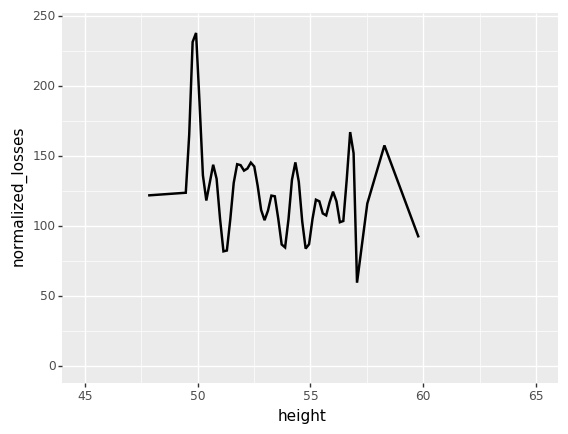

<ggplot: (107165863744)>

In [33]:
(ggplot(sampled_train, aes('height', 'normalized_losses'))
 +stat_smooth(se=True, method='gpr') + xlim(45, 65) + ylim(0, 240))

#### Above graph shows how normalized_losses changes along with changes in height.

### 'symboling' vs. 'normalized_losses'

In [34]:
sampled_train['symboling'].describe()

count    131.000000
mean       0.900763
std        1.257928
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

C:\Users\Minyeong\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\smoothers.py:261: PlotnineWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "for parameters to pass in as 'method_args'", PlotnineWarning)
C:\Users\Minyeong\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


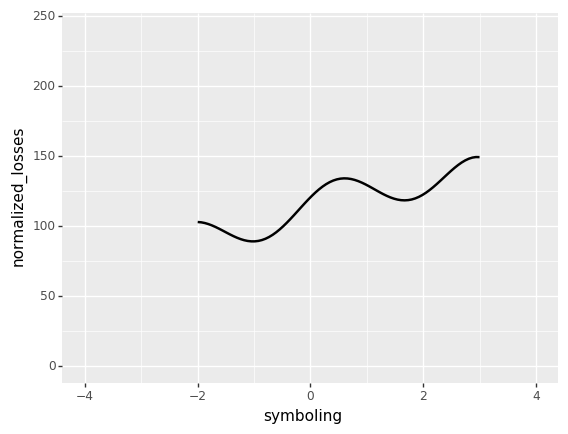

<ggplot: (-9223371929684511470)>

In [35]:
(ggplot(sampled_train, aes('symboling', 'normalized_losses'))
 +stat_smooth(se=True, method='gpr') + xlim(-4, 4) + ylim(0, 240))

#### Based on above graph, I can see that normalized losses increases as symboling increases, from -1 to 0.7 and from 1.8 to 3. 

### 'price' vs. 'normalized_losses'

In [36]:
sampled_train['price'].describe()

count      131.000000
mean     13542.902738
std       7796.118562
min       5118.000000
25%       7927.500000
50%      11549.000000
75%      16530.500000
max      45400.000000
Name: price, dtype: float64

C:\Users\Minyeong\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\smoothers.py:261: PlotnineWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "for parameters to pass in as 'method_args'", PlotnineWarning)


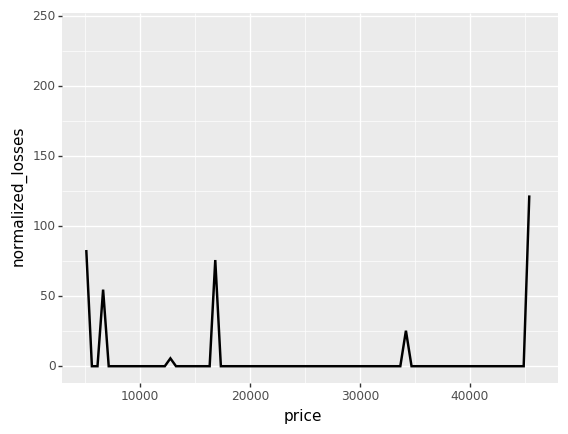

<ggplot: (-9223371929684503243)>

In [37]:
(ggplot(sampled_train, aes('price', 'normalized_losses'))
 +stat_smooth(se=True, method='gpr') + xlim(5000, 46000) + ylim(0, 240))

#### Based on above graph, I can see how normalized losses changes as price changes. However, there is an issue in that when one feature changes, other features also change. This prevents me from assessing the true effect of price on normalized_losses.

## Partial Dependence Plot (PDP) : Seeing independent changes

#### To be able to see the true effect of feature on the target variable, I will plot partial dependence plot using the pdpbox library. In the partial dependence plot, all of other features stay constant, while one feature in question artificially changes. Then predictions made for each of the observations in the dataset will be averaged.

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr_tuned = RandomForestRegressor(min_samples_leaf = 4,
                                  n_estimators = 14,
                                  max_features = 0.5, random_state=1)

In [39]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
import pdpbox
from pdpbox.pdp import pdp_plot, pdp_isolate

def plot_pdp(model, X, feature_names, feature, clusters = None):
    iso = pdp_isolate(rfr_tuned, X_train, X_train.columns, feature)
    return pdp_plot(iso, feature, plot_lines = True, 
                    cluster = clusters,
                    n_cluster_centers = clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3e9da320>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3ea23400>})

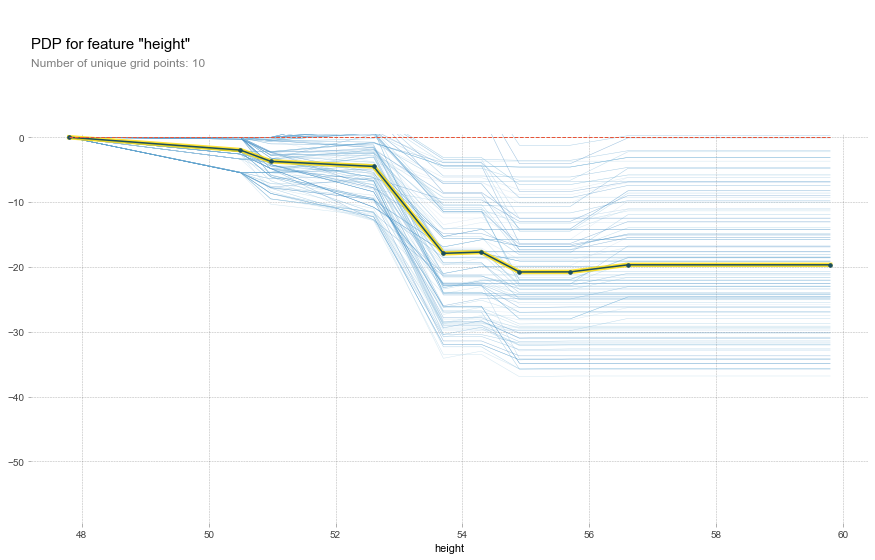

In [41]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'height', None)

#### Above plot shows the average value of the target variable in the yellow line, and each light blue line displays the predicted values of the target variable for every observation. Based on that, I can see that normalized losses tend to decrease as height of the car increases.

#### To simplify the plot, I can cluster the above paths. The below plot will group the paths into 15 clusters. 

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3d79e9b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3d7e3630>})

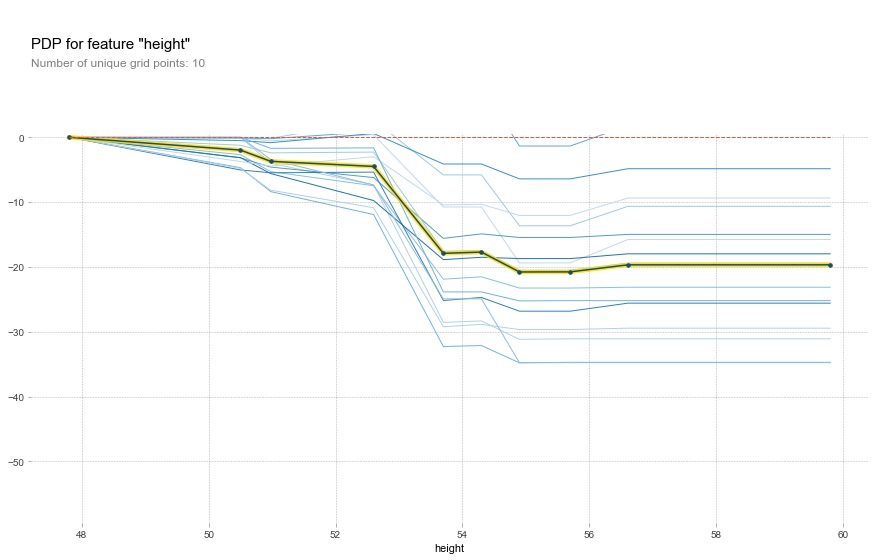

In [42]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'height', 15)

#### On average, the normalized losses decreases as height increases until height reaches 54.2, after that, it plateaus. 

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3ec19c18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3f06d208>})

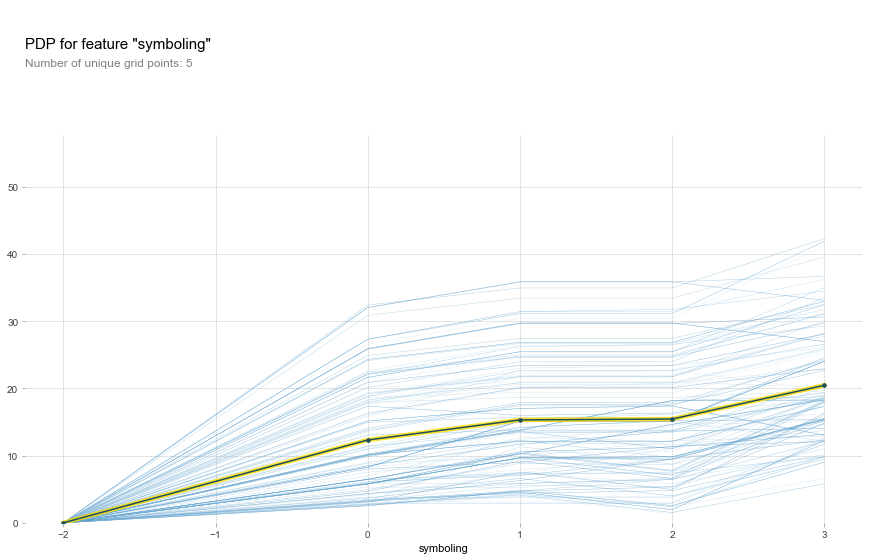

In [43]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'symboling', None)

#### Based on above, I can see as symboling increases, normalized losses increases.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3f538d68>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3f25b8d0>})

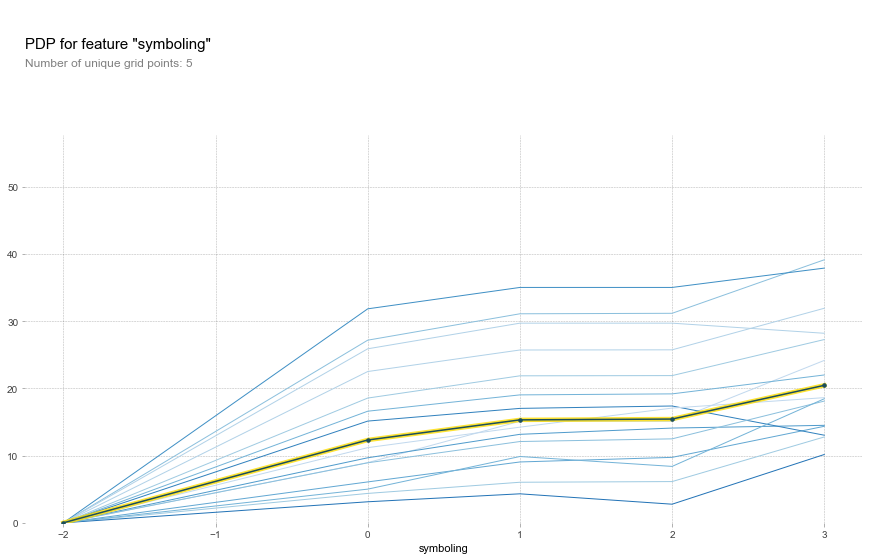

In [44]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'symboling', 15)

#### Simplified plot above also shows that as symboling increases, the normalized losses increases.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3f308c18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3f347048>})

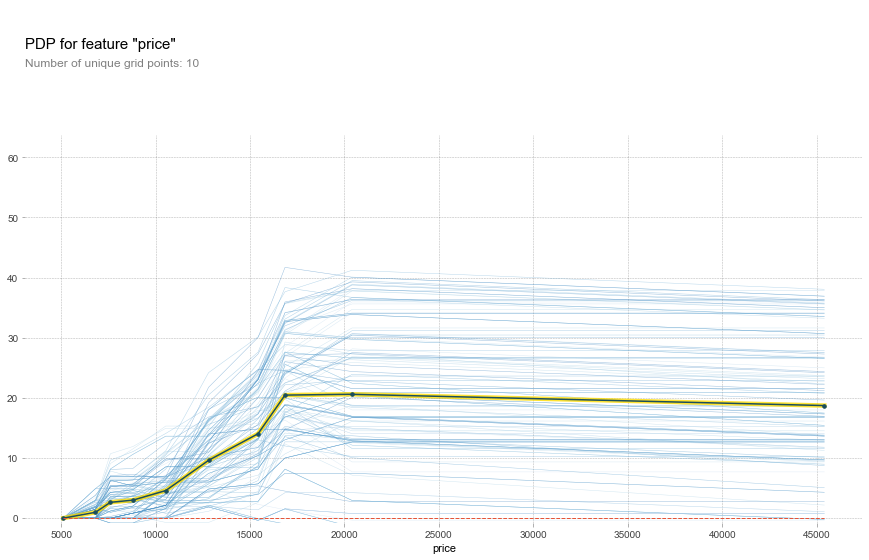

In [45]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'price', None)

#### Based on above plot, I can see that normalized losses increases as price increases, and reaches plateau at price of 17000.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3fc51208>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18f3fca5358>})

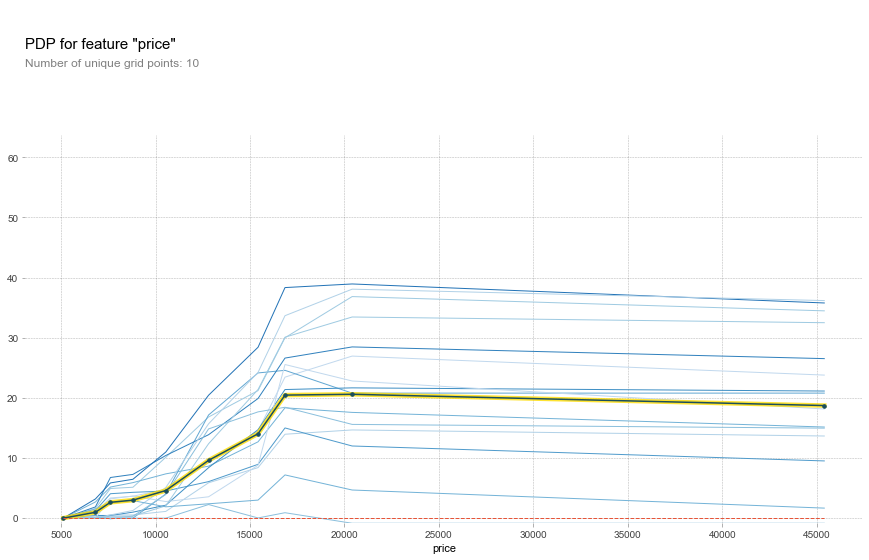

In [46]:
plot_pdp(rfr_tuned, X_train.sample(131), X_train.columns, 'price', 15)

#### The simplied version of plot also shows that normalized losses increases as price increases until it reaches plateau at price of 17000.

## Quantifying the impact

#### Take the significant feature variables to random forest model and find the amount of impact on the target variable.

### Working with a Single Tree

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfr_tuned = RandomForestRegressor(min_samples_leaf = 4,
                                  n_estimators = 14,
                                  max_features = 0.5, random_state=1)

In [48]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
len(rfr_tuned.estimators_)

14

In [50]:
first_tree = rfr_tuned.estimators_[0]
first_tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=0.5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1791095845, splitter='best')

In [51]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


def plot_tree(dt, feature_names, max_depth):
    return Source(tree.export_graphviz(dt, out_file=None,
                feature_names=feature_names, max_depth=max_depth,
                filled=True, rounded=True))

In [52]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

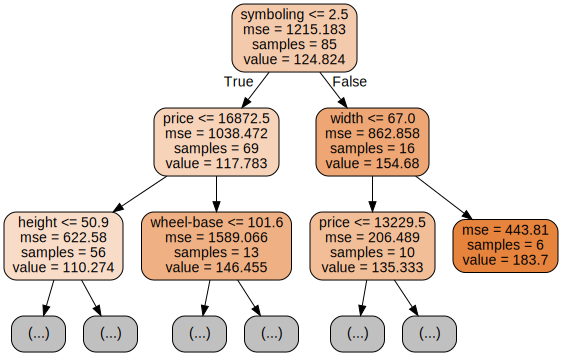

In [53]:
plot_tree(first_tree, X_train.columns, 2)

#### Predicted normalized losses value of the observation goes from 124.824 to 117.783 to 110.274.

In [54]:
124.824-117.783

7.040999999999997

In [55]:
117.783 - 110.274

7.509

In [56]:
y_train.mean()

124.56488549618321

#### The predicted value 124.824 before there are any splits in the data is actually the average value of the data.

#### When symboling is less than or equal to 2.5 then 117.783 is the predicted value, and when, in addition, price <=16872.5, the predicted value is 110.274.

#### To determine the impact of each feature, we see how the predicted value changes as we move from node to node. These are the contribution values we get by using the eli5's explain_prediction_df. 

In [57]:
X_train.shape

(131, 10)

In [58]:
X_train.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other
0,-1.0,4.0,103.3,174.6,64.6,59.8,5000.0,30.0,8921.0,1.0
1,0.0,4.0,95.7,169.7,63.6,59.1,4800.0,37.0,6918.0,0.0


In [59]:
first_obs = X_train.loc[0]

In [60]:
X_train.loc[0]

symboling         -1.0
num_of_doors       4.0
wheel-base       103.3
length           174.6
width             64.6
height            59.8
peak_rpm        5000.0
highway_mpg       30.0
price           8921.0
make_other         1.0
Name: 0, dtype: float64

In [61]:
import eli5
explained_first_obs_df = eli5.explain_prediction_df(first_tree, first_obs)

selected = explained_first_obs_df.feature.isin(['<BIAS>', 'symboling', 'price'])
explained_first_obs_df[selected]

,target,feature,weight,value
0,y,<BIAS>,124.824427,1.0
3,y,symboling,-7.041409,-1.0
4,y,price,-7.509209,8921.0


In [62]:
explained_first_obs_df

,target,feature,weight,value
0,y,<BIAS>,124.824427,1.0
1,y,make_other,14.893333,1.0
2,y,height,-3.633810,59.8
3,y,symboling,-7.041409,-1.0
4,y,price,-7.509209,8921.0
5,y,length,-12.158333,174.6


#### I can see that the contribution value is shown as weight in the table above. I can understand how to calculate the feature weight of a single tree on an observation. Next, I will see how to calculate the featue weights of an entire forest on an observation.

### Multiple Trees

#### To calculate the feature weights of an entire forest on an observation, I can simply take the average feature contrbutions from each tree. I will use the eli5.explain_prediction_df function for this.

In [63]:
explained_first_obs_df_rfr=eli5.explain_prediction_df(rfr_tuned, first_obs)
explained_first_obs_df_rfr

,target,feature,weight,value
0,y,<BIAS>,124.883315,1.0
1,y,make_other,3.307396,1.0
2,y,peak_rpm,0.703620,5000.0
3,y,highway_mpg,-1.066868,30.0
4,y,width,-2.082226,64.6
5,y,num_of_doors,-3.008900,4.0
6,y,wheel-base,-3.052266,103.3
7,y,length,-4.036252,174.6
8,y,price,-6.348450,8921.0
9,y,symboling,-8.943874,-1.0


In [64]:
# explain_prediction_df for each of the observations and combine them into one dataframe
prediction_expls = []
for idx, row in X_train.iterrows():
    prediction_expls.append(eli5.explain_prediction_df(rfr_tuned, row))

In [65]:
train_expl_df = pd.concat(prediction_expls, keys=X_train.index,
                         names = ['observation'])

In [66]:
train_expl_df.head(3)

target     feature      weight   value
observation                                         
0           0      y      <BIAS>  124.883315     1.0
            1      y  make_other    3.307396     1.0
            2      y    peak_rpm    0.703620  5000.0

In [67]:
train_expl_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (0, 0) to (130, 10)
Data columns (total 4 columns):
target     1428 non-null object
feature    1428 non-null object
weight     1428 non-null float64
value      1428 non-null float64
dtypes: float64(2), object(2)
memory usage: 50.0+ KB


In [68]:
train_expl_df.value = train_expl_df.value.astype('float64')

In [69]:
train_expl_df.iloc[:5]

target      feature      weight   value
observation                                          
0           0      y       <BIAS>  124.883315     1.0
            1      y   make_other    3.307396     1.0
            2      y     peak_rpm    0.703620  5000.0
            3      y  highway_mpg   -1.066868    30.0
            4      y        width   -2.082226    64.6

In [70]:
unstacked_train_expl_df = (train_expl_df.groupby(['observation', 'feature'])
                           .weight  
                           .aggregate('first')
                           .unstack())
                          
unstacked_train_expl_df.head()

feature,<BIAS>,height,highway_mpg,length,make_other,num_of_doors,peak_rpm,price,symboling,wheel-base,width
observation,,,,,,,,,,,
0,124.883315,-9.479683,-1.066868,-4.036252,3.307396,-3.008900,0.703620,-6.348450,-8.943874,-3.052266,-2.082226
1,124.883315,-7.360162,0.043772,-1.605367,-0.918387,-2.786728,-3.218985,-8.243551,-1.515612,-1.432356,-3.707651
2,124.883315,1.442146,-0.281847,-2.498807,1.895671,-0.990022,-3.243150,9.858288,1.544249,1.998427,-0.211370
3,124.883315,8.223478,0.923101,-2.464619,-2.692013,2.089575,-3.766752,-3.581278,1.966282,-0.438551,-0.120439
4,124.883315,-7.352724,1.967955,3.208929,0.571776,-0.990022,2.585130,15.990390,1.544249,3.785702,2.966209


In [71]:
unstacked_train_expl_df.describe()[unstacked_train_expl_df.describe().index.isin(['mean', 'std'])]

feature,<BIAS>,height,highway_mpg,length,make_other,num_of_doors,peak_rpm,price,symboling,wheel-base,width
mean,1.248833e+02,-0.051633,0.016271,0.160698,-0.135574,-0.288651,0.187594,-0.309214,-0.173190,0.009822,0.097356
std,3.423698e-13,8.224890,1.542401,4.471890,2.262797,2.392728,2.378916,7.735058,6.080392,3.312225,4.159963


#### Above table shows that the standard deviation of weight is much larger than the mean. This means that for some observations, there is a large impact of this feature on the target variable while for other observations, this feature does not matter.

In [72]:
X_train[['price', 'height', 'symboling']].describe()

,price,height,symboling
count,131.000000,131.000000,131.000000
mean,13542.902738,53.700000,0.900763
std,7796.118562,2.572637,1.257928
min,5118.000000,47.800000,-2.000000
25%,7927.500000,51.600000,0.000000
50%,11549.000000,54.100000,1.000000
75%,16530.500000,55.550000,2.000000
max,45400.000000,59.800000,3.000000


## Back to plotting

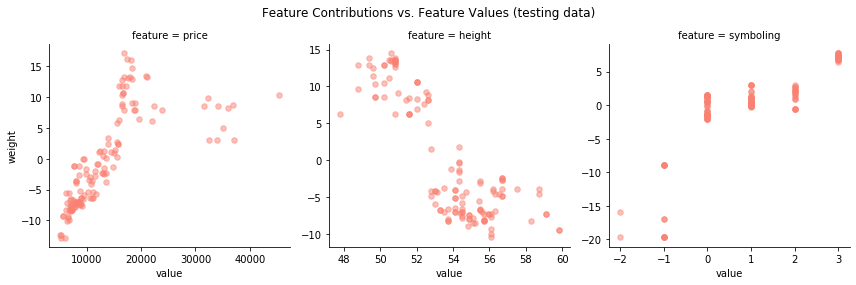

In [73]:
import seaborn as sns

fg = sns.lmplot(x='value', y='weight', col='feature',
                data=train_expl_df.loc[train_expl_df.feature.isin(['price', 'height', 'symboling'])], 
                col_order=['price', 'height', 'symboling'], sharex=False, sharey=False, col_wrap=3, fit_reg=False, 
                height=4, scatter_kws={'color':'salmon', 'alpha': 0.5, 's':30})


fg.fig.suptitle('Feature Contributions vs. Feature Values (testing data)')
fg.fig.subplots_adjust(top=0.85);

#### Based on above, I can see that the model appears to reward 'price' as it proceeds to 20000. And it appears to decrease the weight of 'height' variable as 'height' increases. Also, it turns out that the model appears to reward 'symboling' as 'symboling' increases from -2 to 3. 